In [1]:
# Bibliotecas principais
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Exemplo de modelo, podemos ajustar depois
from sklearn.preprocessing import LabelEncoder

# Exibição
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')


In [6]:
import pandas as pd

url = 'https://raw.githubusercontent.com/danielaschuck/SmartKitchen/main/base.csv'
df = pd.read_csv(url)

df.head()


,Nome da Receita,Ingredientes,Tempo de Preparo (min),Calorias (kcal),Tipo de Refeição,Preferência Dietética,Objetivo
0,Omelete de claras com espinafre,"Claras de ovo, espinafre, cebola",10,150,Café da manhã,Proteico,Ganho de massa
1,Panqueca de banana fit,"Banana, ovo, aveia",10,220,Café da manhã,Proteico,Ganho de massa
2,Smoothie de morango com proteína,"Morango, iogurte natural, whey protein",5,200,Café da manhã,Proteico,Ganho de massa
3,Salada de quinoa com grão-de-bico,"Quinoa, grão-de-bico, tomate, pepino",20,320,Almoço,Vegano,Manutenção
4,Frango grelhado com batata-doce,"frango, batata-doce, azeite",30,450,Almoço,Low carb,Ganho de massa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Nome da Receita         31 non-null     object
 1   Ingredientes            31 non-null     object
 2   Tempo de Preparo (min)  31 non-null     int64 
 3   Calorias (kcal)         31 non-null     int64 
 4   Tipo de Refeição        31 non-null     object
 5   Preferência Dietética   31 non-null     object
 6   Objetivo                31 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.8+ KB
['Café da manhã' 'Almoço' 'Jantar' 'Lanche' 'Sobremesa']
['Proteico' 'Vegano' 'Low carb']
['Ganho de massa' 'Manutenção' 'Perda de peso']


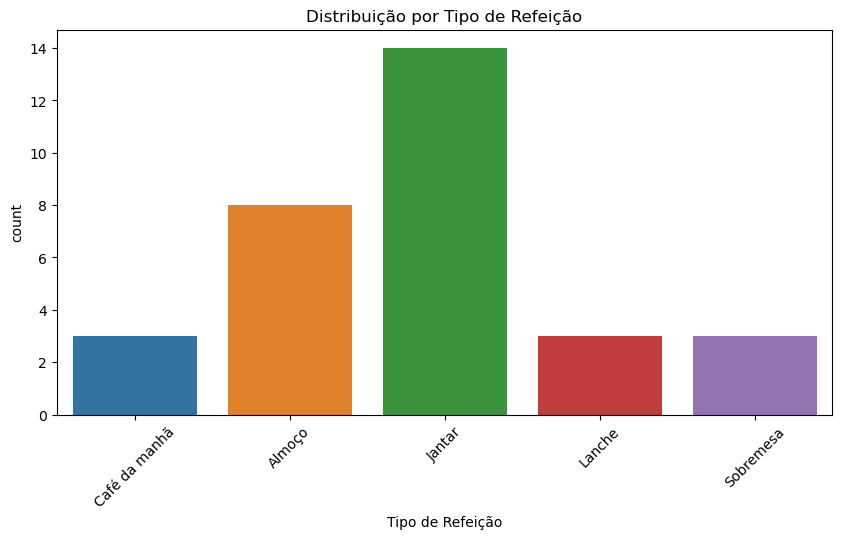

In [7]:
# Informações gerais
df.info()

# Verificar valores únicos em colunas importantes
print(df['Tipo de Refeição'].unique())
print(df['Preferência Dietética'].unique())
print(df['Objetivo'].unique())

# Gráficos para visualizar a distribuição
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Tipo de Refeição')
plt.xticks(rotation=45)
plt.title('Distribuição por Tipo de Refeição')
plt.show()


In [8]:
# Transformar a coluna de Ingredientes em listas
df['Ingredientes'] = df['Ingredientes'].apply(lambda x: [item.strip().lower() for item in x.split(',')])


In [9]:
def buscar_receitas_por_ingrediente(ingrediente):
    ingrediente = ingrediente.lower()
    receitas = df[df['Ingredientes'].apply(lambda x: ingrediente in x)]
    return receitas[['Nome da Receita', 'Ingredientes']]

# Exemplo de uso:
ingrediente_usuario = 'frango'
resultado = buscar_receitas_por_ingrediente(ingrediente_usuario)
print(resultado)


                       Nome da Receita  \
4      Frango grelhado com batata-doce   
7      Sopa de frango com mandioquinha   
17                Caldo de frango leve   
21  Frango ao curry com arroz integral   
24      Arroz de couve-flor com frango   
30             Sopa de frango low carb   

                                        Ingredientes  
4                      [frango, batata-doce, azeite]  
7                    [frango, mandioquinha, cenoura]  
17                 [frango, cenoura, batata, cebola]  
21           [frango, curry, arroz integral, cebola]  
24                [couve-flor, frango, cebola, alho]  
30  [frango, abobrinha, espinafre, caldo de legumes]  


In [12]:
def buscar_receitas(ingredientes_usuario=None, tipo_refeicao=None, objetivo=None):
    """
    ingredientes_usuario: lista de ingredientes que o usuário tem (ex: ['frango', 'arroz']) ou None
    tipo_refeicao: tipo de refeição desejada (ex: 'Almoço', 'Jantar', 'Sobremesa') ou None
    objetivo: objetivo do usuário (ex: 'Ganho de Massa', 'Saudável') ou None
    """
    
    receitas_filtradas = df.copy()
    
    # Se o usuário informou ingredientes, filtramos
    if ingredientes_usuario:
        ingredientes_usuario = [i.lower() for i in ingredientes_usuario]
        receitas_filtradas = receitas_filtradas[receitas_filtradas['Ingredientes'].apply(
            lambda receita: all(ingrediente in receita for ingrediente in ingredientes_usuario)
        )]
    
    # Se o usuário informou tipo de refeição, filtramos
    if tipo_refeicao:
        receitas_filtradas = receitas_filtradas[receitas_filtradas['Tipo de Refeição'].str.lower() == tipo_refeicao.lower()]
    
    # Se o usuário informou objetivo, filtramos
    if objetivo:
        receitas_filtradas = receitas_filtradas[receitas_filtradas['Objetivo'].str.lower() == objetivo.lower()]
    
    # Se não encontrar nada, podemos dar uma resposta amigável (opcional)
    if receitas_filtradas.empty:
        print("Nenhuma receita encontrada com os critérios informados 😕.")
        return None
    else:
        return receitas_filtradas[['Nome da Receita', 'Ingredientes', 'Tipo de Refeição', 'Objetivo']]


In [11]:
# Exemplo 1: o usuário tem frango e quer ganhar massa no almoço
ingredientes = ['frango']
tipo_refeicao = 'Almoço'
objetivo = 'Ganho de Massa'

resultados = buscar_receitas(ingredientes_usuario=ingredientes, tipo_refeicao=tipo_refeicao, objetivo=objetivo)
print(resultados)


                       Nome da Receita  \
4      Frango grelhado com batata-doce   
21  Frango ao curry com arroz integral   

                               Ingredientes Tipo de Refeição        Objetivo  
4             [frango, batata-doce, azeite]           Almoço  Ganho de massa  
21  [frango, curry, arroz integral, cebola]           Almoço  Ganho de massa  


In [13]:
# Quero ganhar massa, mas não quero listar ingredientes
resultado = buscar_receitas(objetivo='Ganho de Massa')
print(resultado)


                         Nome da Receita  \
0        Omelete de claras com espinafre   
1                 Panqueca de banana fit   
2       Smoothie de morango com proteína   
4        Frango grelhado com batata-doce   
5            Salmão ao forno com legumes   
7        Sopa de frango com mandioquinha   
10             Iogurte com chia e frutas   
13                Brigadeiro fit de whey   
17                  Caldo de frango leve   
21    Frango ao curry com arroz integral   
22          Taco saudável de carne moída   
26  Peixe assado com purê de batata-doce   
29            Caldo de carne com legumes   

                                         Ingredientes Tipo de Refeição  \
0                  [claras de ovo, espinafre, cebola]    Café da manhã   
1                                [banana, ovo, aveia]    Café da manhã   
2            [morango, iogurte natural, whey protein]    Café da manhã   
4                       [frango, batata-doce, azeite]           Almoço   
5            

In [16]:
# 1. Perguntar se o usuário quer buscar por ingredientes
quer_ingredientes = input("Você quer buscar receitas com base nos ingredientes que você tem? (sim/não): ").strip().lower()

ingredientes_usuario = None
if quer_ingredientes == 'sim':
    ingredientes_usuario = input("Digite os ingredientes separados por vírgula: ").lower().split(',')

# 2. Perguntar tipo de refeição
tipo_refeicao = input("Qual tipo de refeição você quer? (Almoço, Jantar, Sobremesa) (ou aperte Enter para pular): ").strip()
tipo_refeicao = tipo_refeicao if tipo_refeicao else None

# 3. Perguntar objetivo
objetivo = input("Qual é seu objetivo? (Saudável, Ganho de Massa, etc) (ou aperte Enter para pular): ").strip()
objetivo = objetivo if objetivo else None

# 4. Buscar receitas com base nas respostas
receitas_encontradas = buscar_receitas(ingredientes_usuario=ingredientes_usuario, tipo_refeicao=tipo_refeicao, objetivo=objetivo)

# 5. Exibir resultados
if receitas_encontradas is not None:
    print("\nReceitas encontradas para você:")
    print(receitas_encontradas.to_string(index=False))
else:
    print("\nTente mudar os filtros para encontrar mais receitas!")


Você quer buscar receitas com base nos ingredientes que você tem? (sim/não):  não
Qual tipo de refeição você quer? (Almoço, Jantar, Sobremesa) (ou aperte Enter para pular):  Jantar
Qual é seu objetivo? (Saudável, Ganho de Massa, etc) (ou aperte Enter para pular):  Ganho de Massa



Receitas encontradas para você:
                     Nome da Receita                           Ingredientes Tipo de Refeição       Objetivo
     Sopa de frango com mandioquinha        [frango, mandioquinha, cenoura]           Jantar Ganho de massa
                Caldo de frango leve      [frango, cenoura, batata, cebola]           Jantar Ganho de massa
Peixe assado com purê de batata-doce   [filé de peixe, batata-doce, azeite]           Jantar Ganho de massa
          Caldo de carne com legumes [carne magra, batata, cenoura, cebola]           Jantar Ganho de massa
